In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

import warnings
warnings.filterwarnings('ignore')

mouse_drug_data_to_load = "../../Homework/Instructions/Pymaceuticals/data/mouse_drug_data.csv"
clinical_trial_data_to_load = "../../Homework/Instructions/Pymaceuticals/data/clinicaltrial_data.csv"

mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

In [2]:
mouse_clinic_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on="Mouse ID")

In [20]:
all_drug_plots = []

all_drugs = mouse_clinic_df['Drug'].unique()

colors = ["Red", "Blue", "Green", "Black", "gray", "Red", "Blue", "Green", "Black", "gray"]

def treatments(list_drugs):
    color = 0
    for drug in list_drugs:
        drug_df = mouse_clinic_df.loc[mouse_clinic_df['Drug'] == (drug)]
        times = drug_df['Timepoint'].unique()
        means = [drug_df.loc[drug_df['Timepoint'] == (time)]['Tumor Volume (mm3)'].mean() for time in times]
        sample = [drug_df.loc[drug_df['Timepoint'] == (time)]['Tumor Volume (mm3)'] for time in times]

        x_axis = drug_df['Timepoint'].unique()
        standard_errors = [sem(s) for s in sample]
                
        fig, ax = plt.subplots()
        ax.errorbar(x_axis, means, standard_errors, fmt="o", color=colors[color])
        ax.set_xlabel("Timepoint")
        ax.set_ylabel("Tumor Volume (mm3)")
        ax.set_title(f"Effects of {drug} on Test Subjects")
        
        color +=1
        
    return all_drug_plots

[]

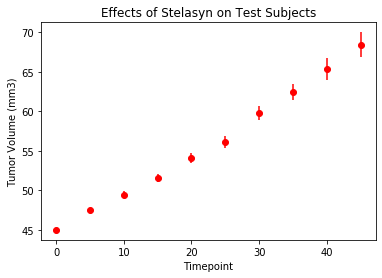

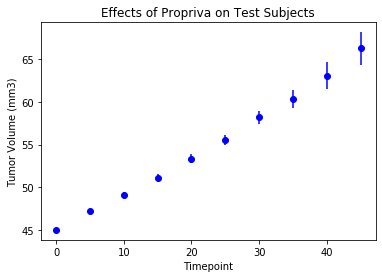

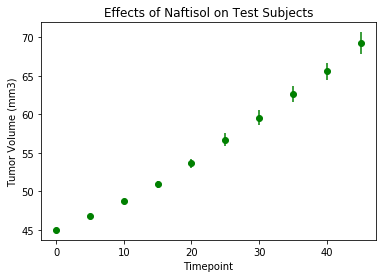

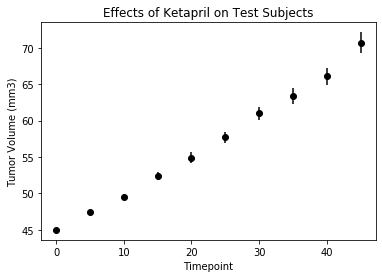

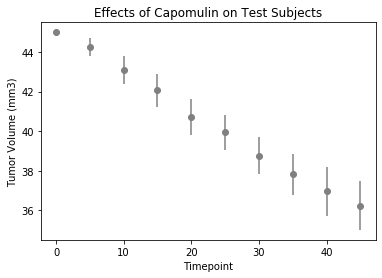

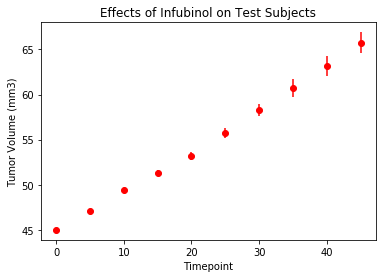

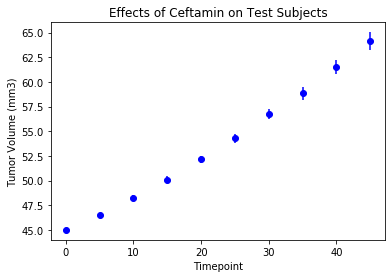

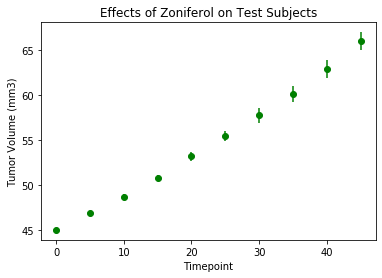

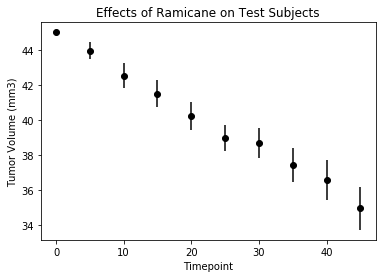

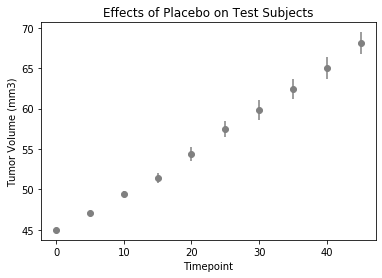

In [21]:
treatments(all_drugs)

In [36]:
all_met_site_plots = []

all_drugs = mouse_clinic_df['Drug'].unique()

colors = ["Red", "Blue", "Green", "Black", "gray", "Red", "Blue", "Green", "Black", "gray"]

def metastatic_sites(list_drugs):
    color = 0
    for drug in list_drugs:
        drug_df = mouse_clinic_df.loc[mouse_clinic_df['Drug'] == (drug)]
        times = drug_df['Timepoint'].unique()
        means = [drug_df.loc[drug_df['Timepoint'] == (time)]['Metastatic Sites'].mean() for time in times]
        sample = [drug_df.loc[drug_df['Timepoint'] == (time)]['Metastatic Sites'] for time in times]

        x_axis = drug_df['Timepoint'].unique()
        standard_errors = [sem(s) for s in sample]
                
        fig, ax = plt.subplots()
        ax.errorbar(x_axis, means, standard_errors, fmt="o", color=colors[color])
        ax.grid(color='gray', linestyle='-', linewidth=0.2)
        ax.set_xlabel("Timepoint")
        ax.set_ylabel("'Metastatic Sites'")
        ax.set_title(f"Number of Metastatic Sites in Test Subjects While on {drug}")
        
        color +=1
        
#     return all_met_site_plots

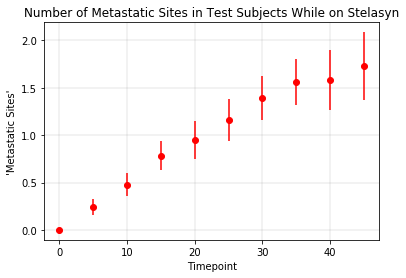

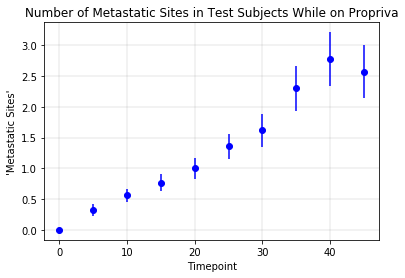

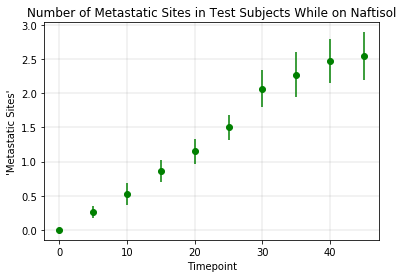

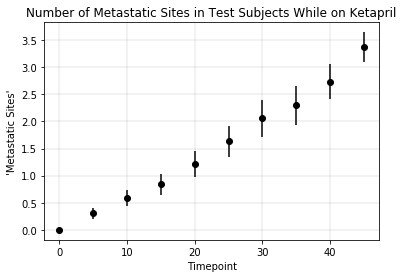

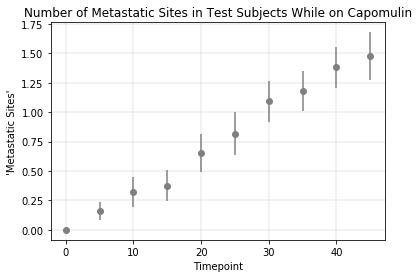

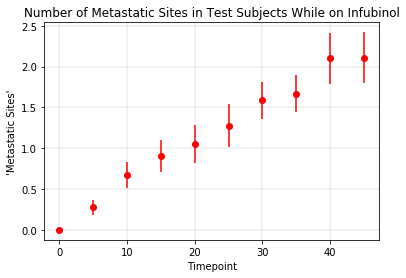

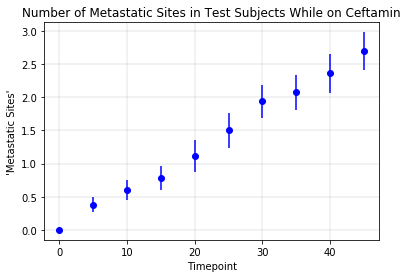

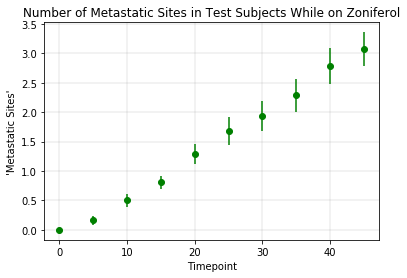

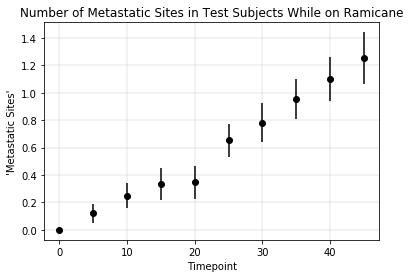

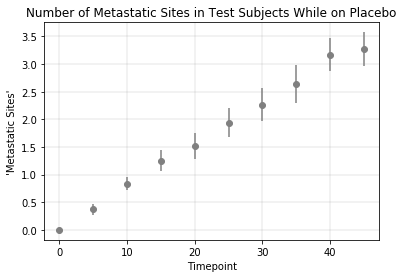

In [38]:
metastatic_sites(all_drugs)